In [57]:
import numpy as np
heigth = np.random.randint(low=150,high=160,size=24)
weigth = np.random.randint(low=45,high=80,size=24)

In [58]:
import pandas as pd
df = pd.DataFrame({
    'Height': heigth,
    'Weight': weigth
})

In [59]:
df

,Height,Weight
0,159,47
1,154,48
2,155,51
3,156,48
4,152,47
5,155,54
6,159,69
7,152,72
8,152,74
9,155,78


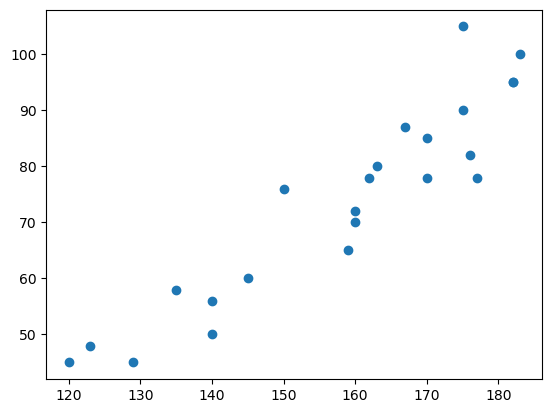

In [62]:
import matplotlib.pyplot as plt
df = pd.read_csv('height-weight.csv')
plt.scatter(df['Height'],df['Weight'])

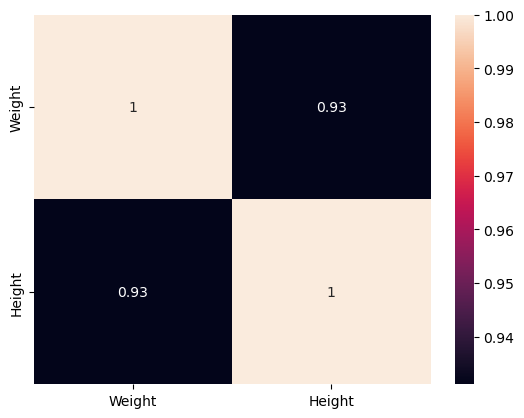

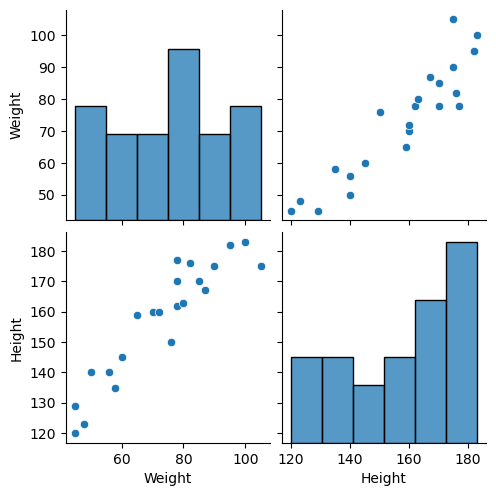

In [65]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)
plt.show()
sns.pairplot(df)

In [94]:
X =df[['Weight']]# should be 2d array or df
y=df['Height']# should be in series or one d array

In [95]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.25,random_state=42)

In [96]:
X_train.shape

(17, 1)

In [97]:
## Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [98]:
scaler.transform(X_test)

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [99]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

In [100]:
regression.fit(X_train,y_train)

LinearRegression()

In [101]:
print(f"This is the beta1{regression.coef_}")#beta1

This is the beta1[1.04792503]


In [102]:
regression.intercept_

80.52684512622542

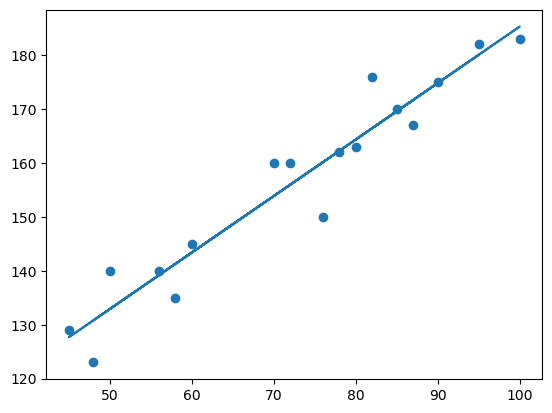

In [104]:
## plot 

plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [105]:
y_pred = regression.predict(X_test)

In [107]:
## Performance Metric
from sklearn.metrics import mean_squared_error,mean_absolute_error

mse = mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228686
9.665125886795005
10.7163749912126


In [ ]:
from sklearn.metrics import r2_score
print(f"Prediction Score:{r2_score(y_test,y_pred)}")

Prediction Score:0.7360826717981279


In [110]:
import statsmodels.api as sm

In [111]:
model = sm.OLS(y_train,X_train).fit()

In [112]:
pred = model.predict(X_test)

In [114]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              1133.
Date:                Wed, 11 Dec 2024   Prob (F-statistic):                    2.80e-16
Time:                        12:01:13   Log-Likelihood:                         -73.806
No. Observations:                  17   AIC:                                      149.6
Df Residuals:                      16   BIC:                                      150.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\janakiram.ch\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


## Mulitple Linear Regression

In [116]:
df = pd.read_csv('economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [119]:
df.drop(['Unnamed: 0','year','month'],axis=1,inplace=True)

In [121]:
df.head(2)

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394


In [125]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

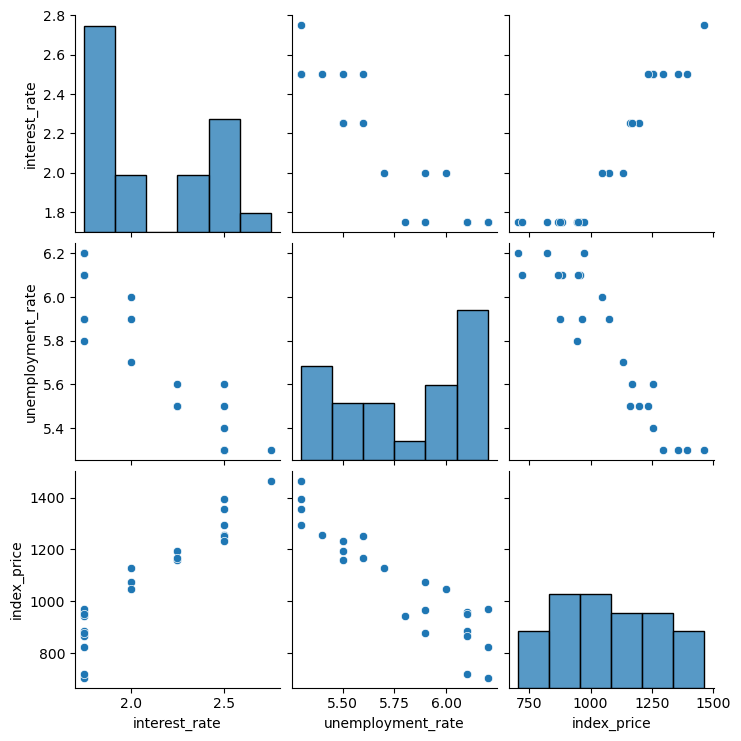

In [126]:
sns.pairplot(df)

<Axes: >

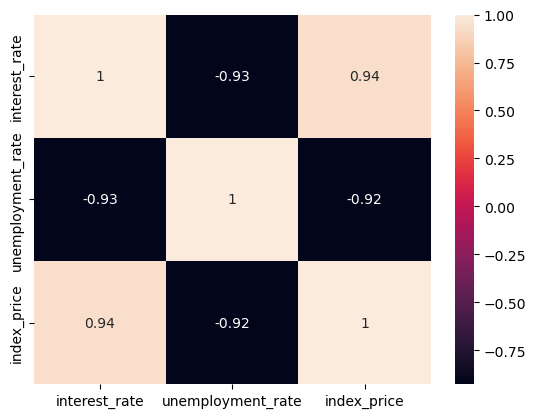

In [127]:
sns.heatmap(df.corr(),annot=True)

In [133]:
# X = df[['interest_rate','unemployment_rate']]
# y=df['index_price']
X= df.iloc[:,:-1]
y= df.iloc[:,-1]

In [136]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)

<Axes: xlabel='interest_rate', ylabel='index_price'>

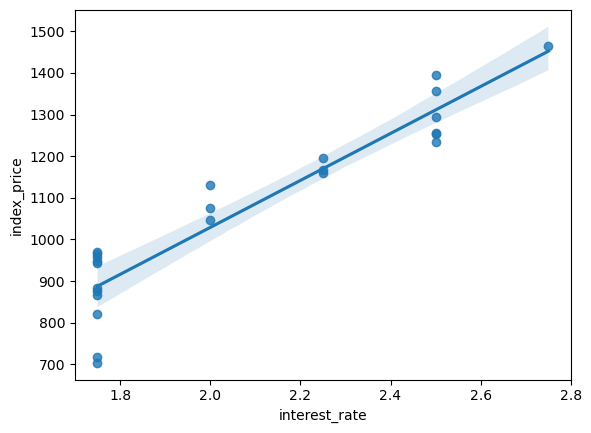

In [138]:
sns.regplot(x=df['interest_rate'],y=df['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

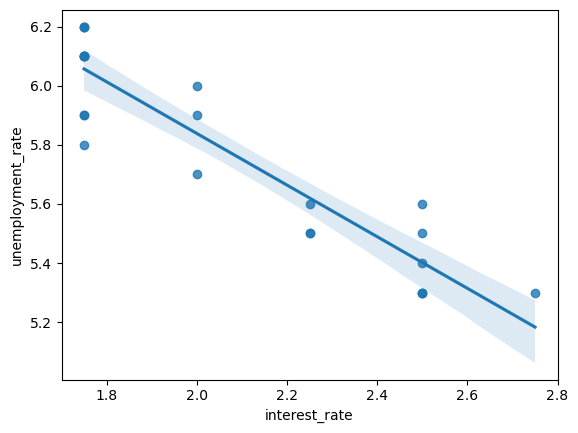

In [140]:
sns.regplot(x=df['interest_rate'],y=df['unemployment_rate'])

In [141]:
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 0.57346234, -0.8615569 ],
       [-0.90115511,  1.30956648],
       [ 2.0480798 , -1.48187786],
       [-0.90115511,  0.999406  ],
       [-0.16384638,  0.37908503],
       [ 0.57346234, -0.55139641]])

In [142]:
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
## Cross Validation
from sklearn.model_selection import cross_val_score

cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=5)

array([-1861.74046551, -8715.8459466 , -7707.52362191, -9169.13776461,
        -791.32842311])

In [143]:
regression.coef_

array([ 260.33709119, -360.58377051])

In [144]:
regression.intercept_

2601.67998660565

In [152]:
y_pred= regression.predict(X_test)

In [153]:
## Performance Metric
from sklearn.metrics import mean_squared_error,mean_absolute_error

mse = mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712565
59.935781523235505
76.11677139574803


In [154]:
from sklearn.metrics import r2_score
print(f"Prediction Score:{r2_score(y_test,y_pred)}")

Prediction Score:0.8278978091457146


## Assumption

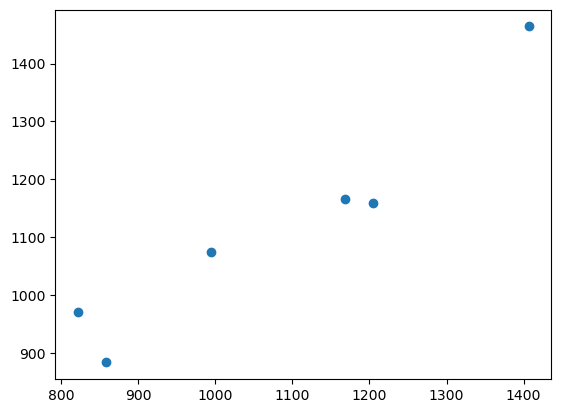

In [155]:
plt.scatter(y_pred,y_test)

In [156]:
res = y_test-y_pred
print(res)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


<Axes: xlabel='index_price', ylabel='Density'>

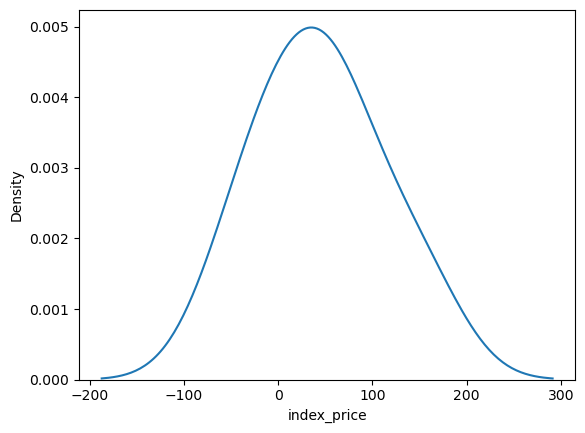

In [157]:
sns.kdeplot(res)

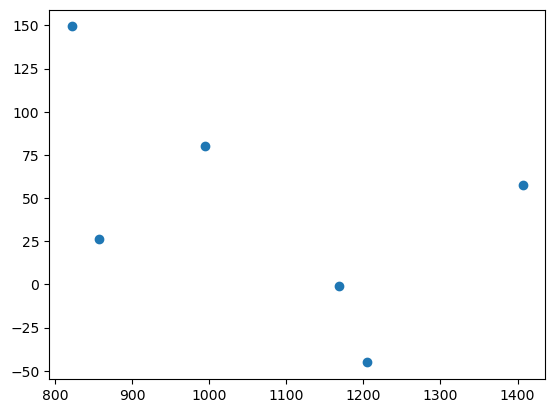

In [158]:
plt.scatter(y_pred,res)